# Unsupervised Learning: Trade&Ahead


## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet


<IPython.core.display.Javascript object>

In [2]:
# Loading the dataset:
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


<IPython.core.display.Javascript object>

In [4]:
# Rename the "Security" column to correspond the dictionary provided:
data.rename(columns={"Security": "Company"}, inplace=True)
data.columns  # To confirm the change has been made

Index(['Ticker Symbol', 'Company', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

<IPython.core.display.Javascript object>

The column has been renamed to match the dictionary provided.

## Data Overview

- Observations
- Sanity checks

In [5]:
# Make a copy of the dataset to work with:
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# Looking at the dimensions of the dataset:
df.shape

(340, 15)

<IPython.core.display.Javascript object>

The dataframe has 340 rows(observations) and 15 columns(attributes).

In [7]:
# View the composition of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Company                       340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

There does not seem to be missing values from the data. All attributes are of the appropriate data type.

In [8]:
# Verify that there are no missing values
df.isnull().sum()

Ticker Symbol                   0
Company                         0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

We have confirmed that there are no missing values in the dataset.

In [9]:
# Extracting a summary of the dataset:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


<IPython.core.display.Javascript object>

**Observations:**
* The `Ticker Symbols` and `Company` variables consist entirely of unique values.They could serve as identifiers and will not have much use in further analysis and will be dropped. 
* `GICS Sector` has 11 unique values while `GICS Sub Industry` has 104 unique values.
* `Industrials` is the most common sector.
* The most common sub industry is `Oil & Gas Exploration & Production`.
* The huge variations for the diffferent attributes highlights the need for scaling. We see that some columns have maximum values in billions while others are much lower with one variable having a max value of 4.58. Outliers are expected in the boxplots.



In [10]:
# Let's check the variation in observations:
df.nunique()

Ticker Symbol                   340
Company                         340
GICS Sector                      11
GICS Sub Industry               104
Current Price                   336
Price Change                    340
Volatility                      340
ROE                              82
Cash Ratio                      124
Net Cash Flow                   332
Net Income                      335
Earnings Per Share              268
Estimated Shares Outstanding    323
P/E Ratio                       295
P/B Ratio                       299
dtype: int64

<IPython.core.display.Javascript object>

* The high variation is expected because of the numerical columns. The exceptions are `Ticker Symbol`, `Company` and `GICS Sub Industry` which have been mentioned already.

In [11]:
# Let's look at the distribution of unique values in the relevant categorical columns:
cat_cols = ["GICS Sector", "GICS Sub Industry"]

for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64
--------------------------------------------------
Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Property & Casualty Insurance                       8
Diversified Financial Services                      7
Bio

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate Analysis:

In [12]:
# Define a function to plot a boxplot and a histogram along the same scale to visualize numerical variables:


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

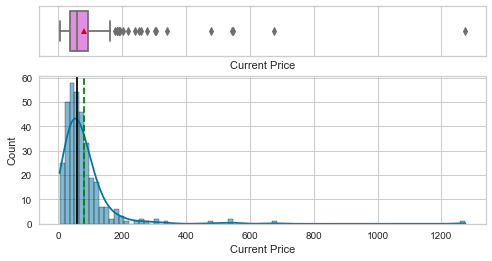

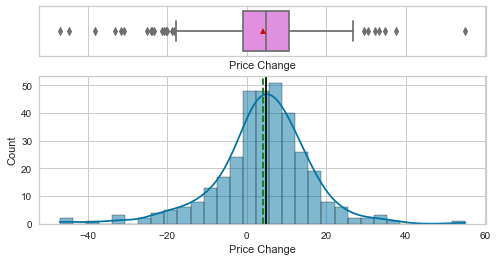

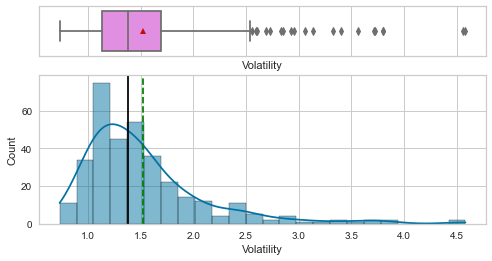

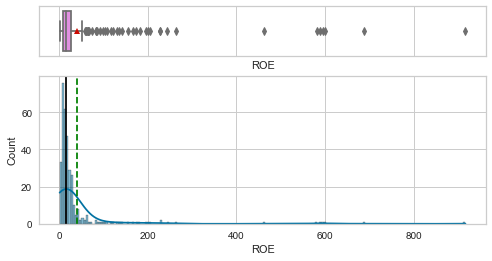

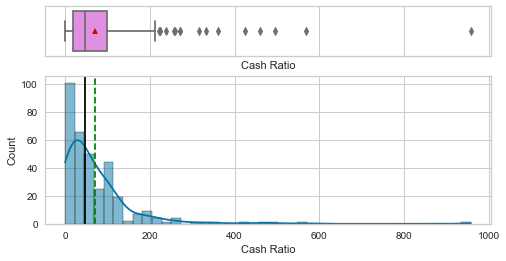

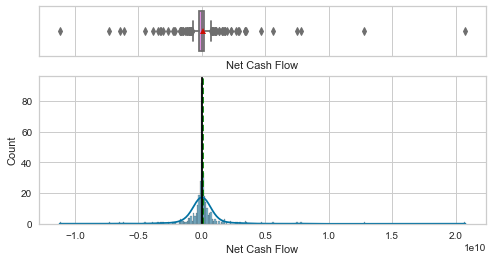

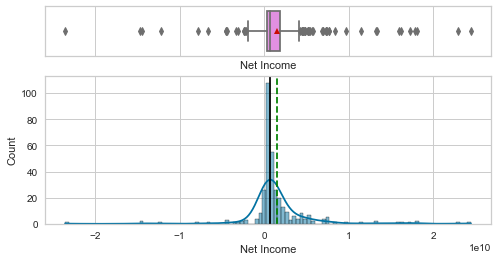

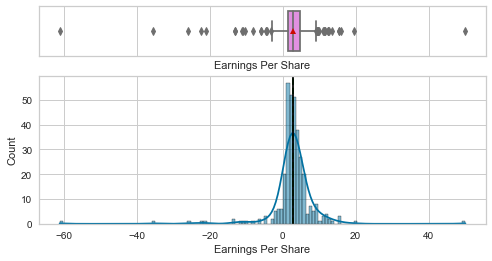

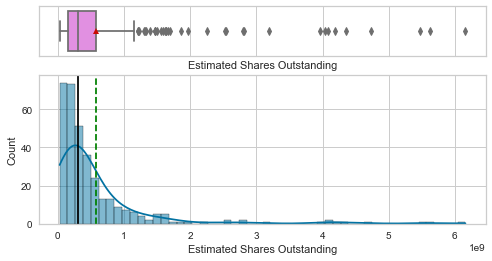

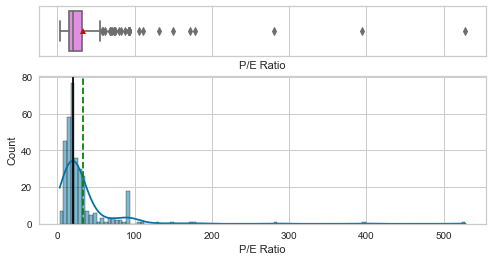

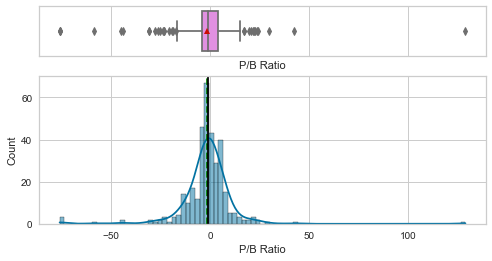

<IPython.core.display.Javascript object>

In [13]:
# Selecting numerical columns only:
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item, kde=True, figsize=(8, 4))

**Observations:**
* All the numerical variables record outliers, some on both side of their boxplots.
* `Current price`, `Volatility`, `ROE`, `Cash Ratio`, `Estimated Shares Outstanding` and `P/E Ratio` all have right-skewed distributions meaning that most of their observations fall at the lower end of the scale and they have outliers on the higher end.
* `Price Change` has a distinctly normal distribution.
* `Net Cash Flow`and `P/B Ratio` lean a little left but have a normal distribution.
* `Earnings Per Share` and `Net Income` lean right but have a normal distribution as well.

In [14]:
# Define a function to create labeled barplots to visualize the relevant categorical variables:


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

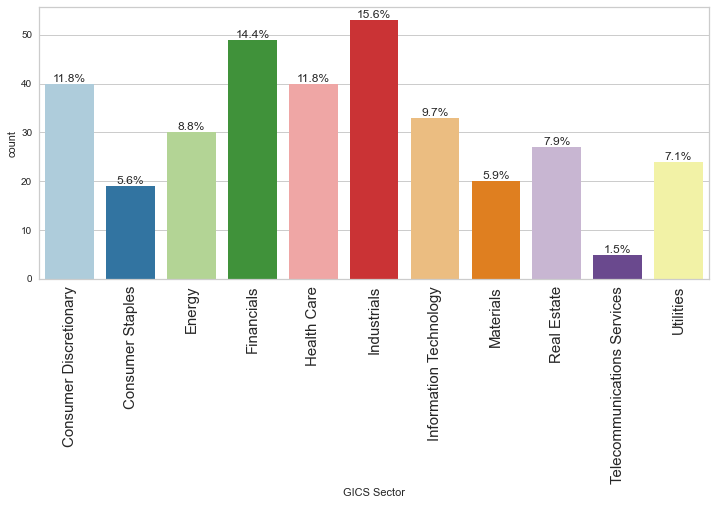

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(df, "GICS Sector", perc=True)

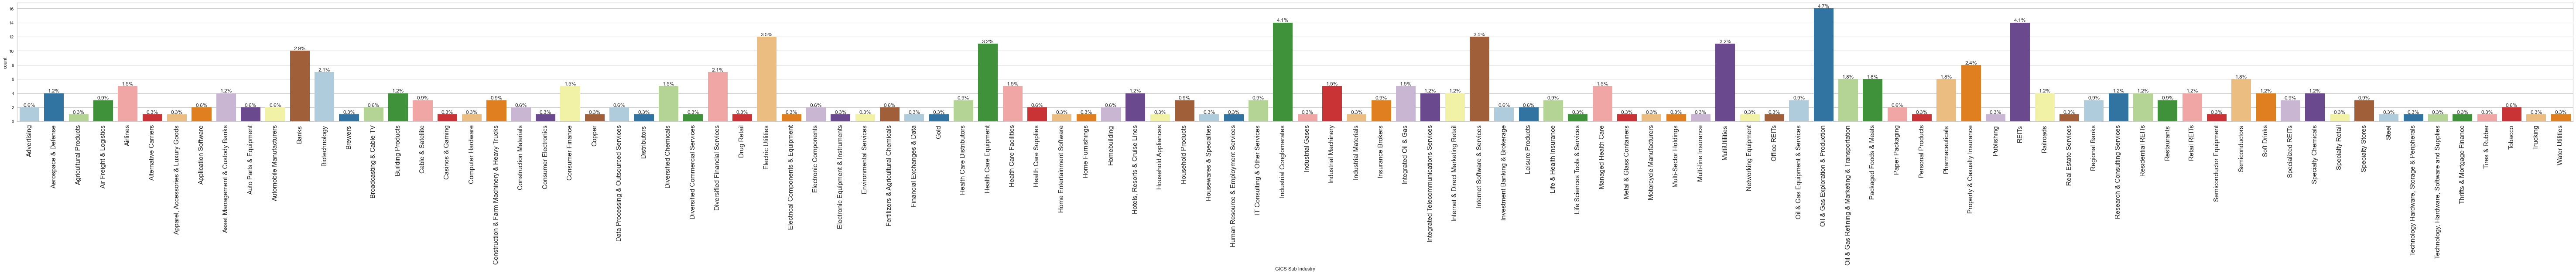

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(df, "GICS Sub Industry", perc=True)

**Observations:**
* `Industrials` and `Financials` are the top 2 sectors.
* `Oil & Gas Exploration & Production` is the leading sub industry with 4.7% followed by `REITs`(Real Estate Investment Trusts) and `Industrial Conglomerates` tying at 4.1%.

## Bivariate/Multivariate Analysis

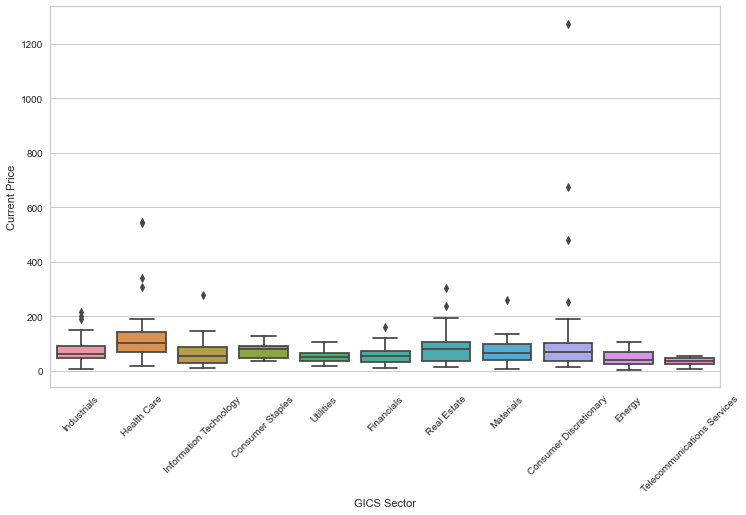

<IPython.core.display.Javascript object>

In [17]:
# Looking at the stock price distribution across sectors:
plt.figure(figsize=(12, 7))

ax = sns.boxplot(x="GICS Sector", y="Current Price", data=df)
plt.xticks(rotation=45)
plt.show()

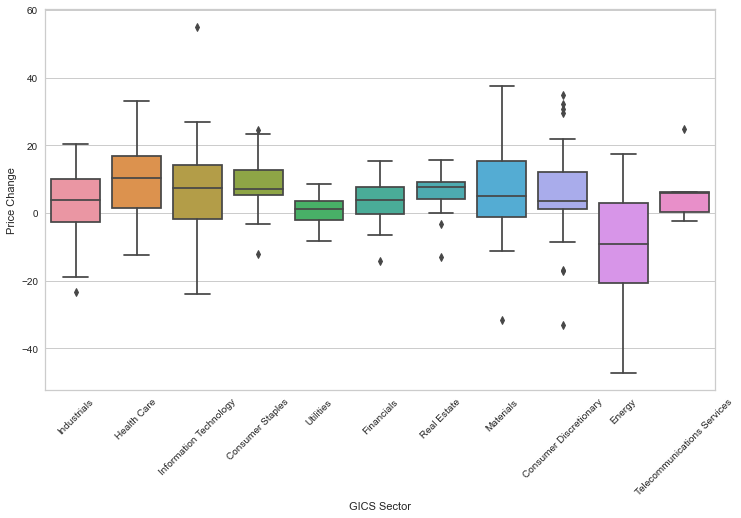

<IPython.core.display.Javascript object>

In [18]:
# Looking at the price change distribution across sectors:
plt.figure(figsize=(12, 7))

ax = sns.boxplot(x="GICS Sector", y="Price Change", data=df)
plt.xticks(rotation=45)
plt.show()

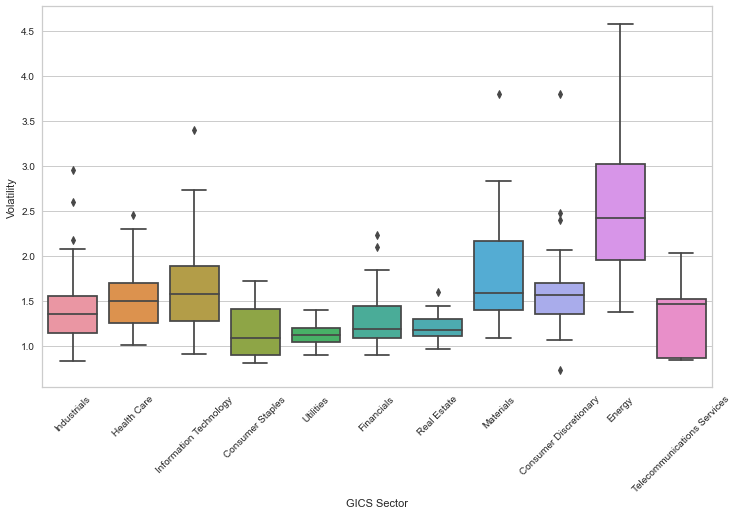

<IPython.core.display.Javascript object>

In [19]:
# Looking at the volatility distribution across sectors:
plt.figure(figsize=(12, 7))

ax = sns.boxplot(x="GICS Sector", y="Volatility", data=df)
plt.xticks(rotation=45)
plt.show()

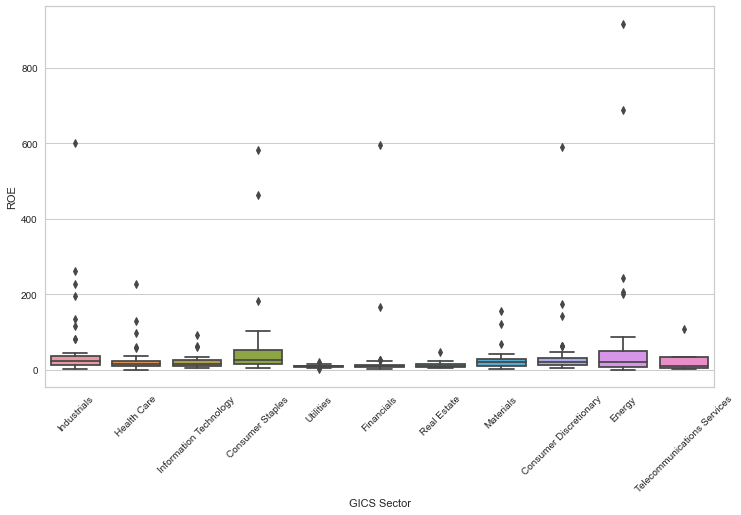

<IPython.core.display.Javascript object>

In [20]:
# Looking at the ROE distribution across sectors:
plt.figure(figsize=(12, 7))

ax = sns.boxplot(x="GICS Sector", y="ROE", data=df)
plt.xticks(rotation=45)
plt.show()

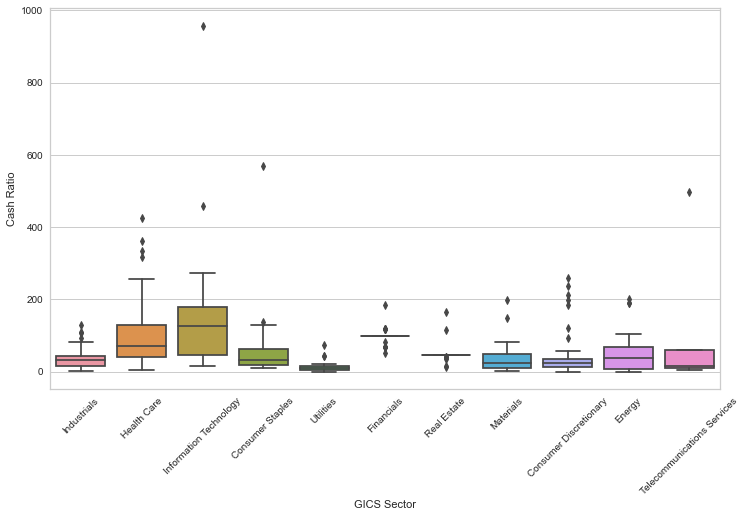

<IPython.core.display.Javascript object>

In [21]:
# Looking at the cash ratio distribution across sectors:
plt.figure(figsize=(12, 7))

ax = sns.boxplot(x="GICS Sector", y="Cash Ratio", data=df)
plt.xticks(rotation=45)
plt.show()

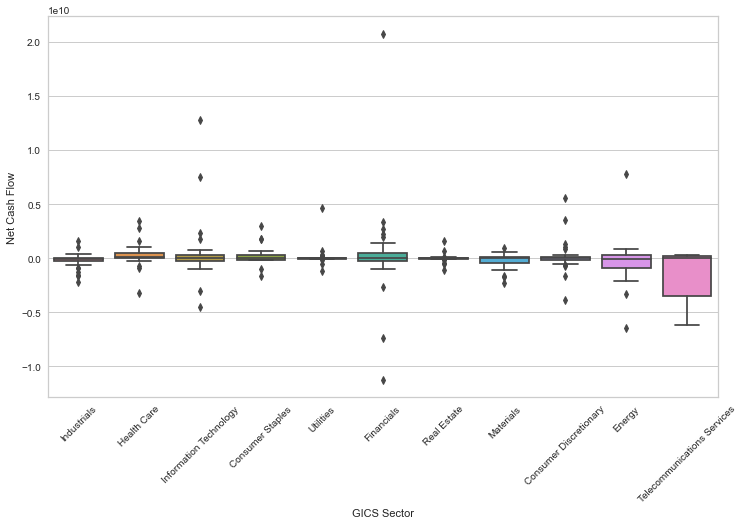

<IPython.core.display.Javascript object>

In [22]:
# Looking at the Net Cash Flow distribution across sectors:
plt.figure(figsize=(12, 7))

ax = sns.boxplot(x="GICS Sector", y="Net Cash Flow", data=df)
plt.xticks(rotation=45)
plt.show()

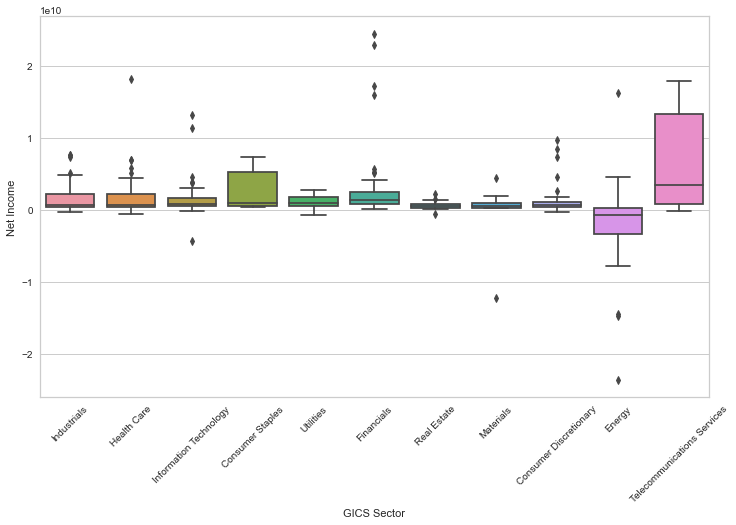

<IPython.core.display.Javascript object>

In [23]:
# Looking at the Net Income distribution across sectors:
plt.figure(figsize=(12, 7))

ax = sns.boxplot(x="GICS Sector", y="Net Income", data=df)
plt.xticks(rotation=45)
plt.show()

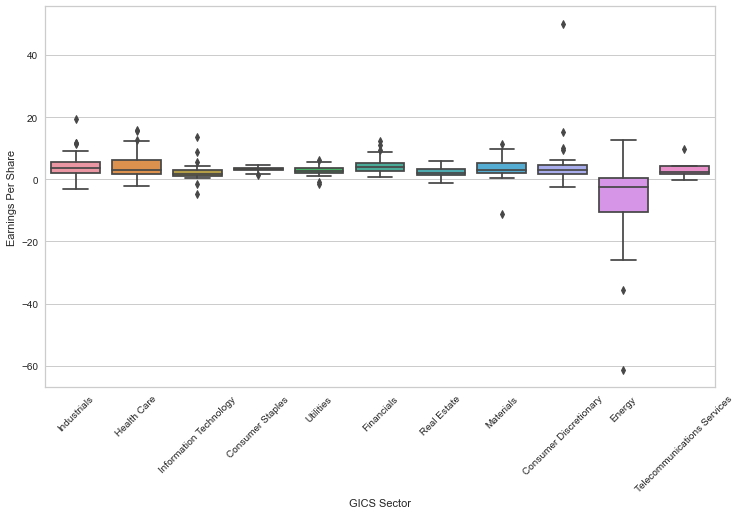

<IPython.core.display.Javascript object>

In [24]:
# Looking at the EPS distribution across sectors:
plt.figure(figsize=(12, 7))

ax = sns.boxplot(x="GICS Sector", y="Earnings Per Share", data=df)
plt.xticks(rotation=45)
plt.show()

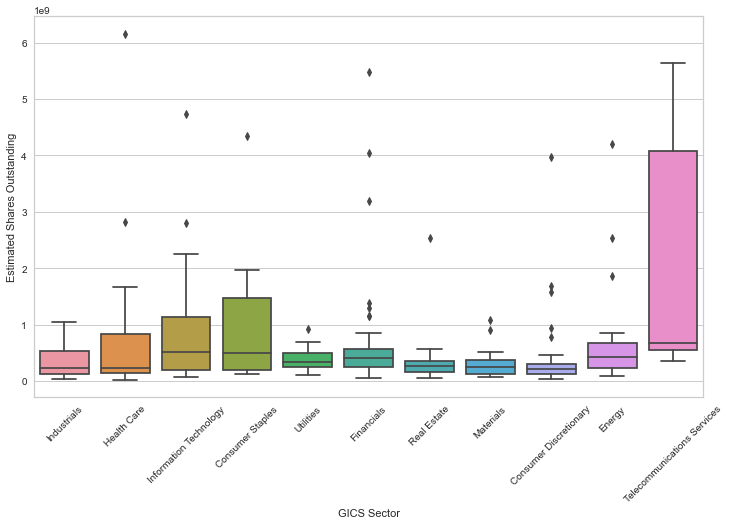

<IPython.core.display.Javascript object>

In [25]:
# Looking at the ESO distribution across sectors:
plt.figure(figsize=(12, 7))

ax = sns.boxplot(x="GICS Sector", y="Estimated Shares Outstanding", data=df)
plt.xticks(rotation=45)
plt.show()

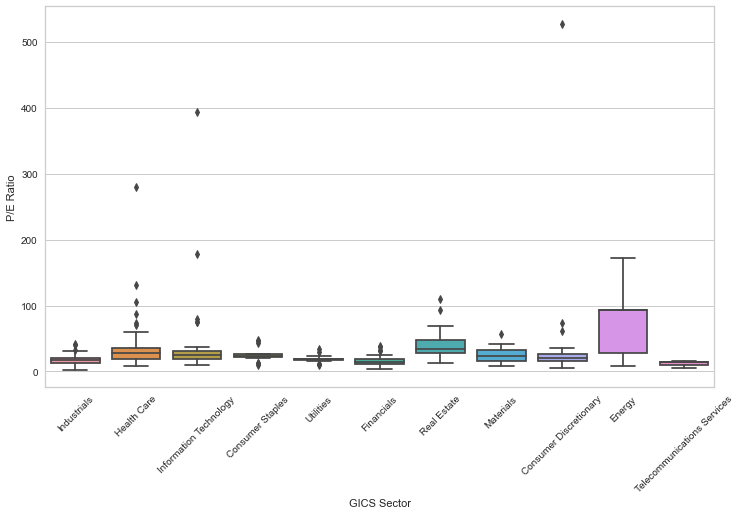

<IPython.core.display.Javascript object>

In [26]:
# Looking at the P/E Ratio distribution across sectors:
plt.figure(figsize=(12, 7))

ax = sns.boxplot(x="GICS Sector", y="P/E Ratio", data=df)
plt.xticks(rotation=45)
plt.show()

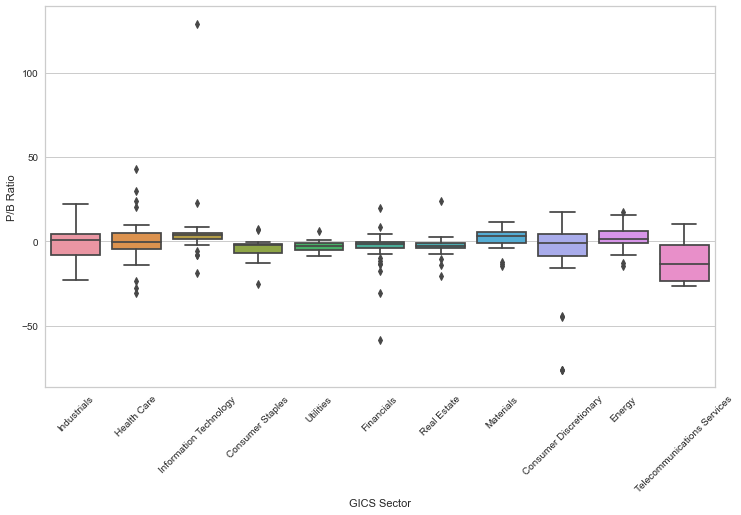

<IPython.core.display.Javascript object>

In [27]:
# Looking at the P/B Ratio distribution across sectors:
plt.figure(figsize=(12, 7))

ax = sns.boxplot(x="GICS Sector", y="P/B Ratio", data=df)
plt.xticks(rotation=45)
plt.show()

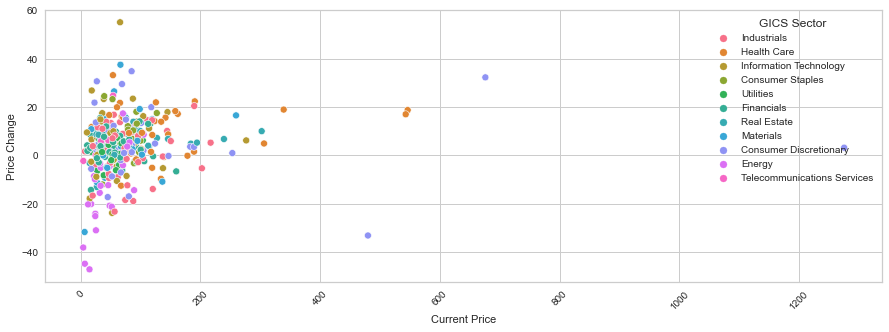

<IPython.core.display.Javascript object>

In [28]:
# Looking at the percentage price change against stock prices across sectors:
plt.figure(figsize=(15, 5))

ax = sns.scatterplot(y="Price Change", x="Current Price", data=df, hue="GICS Sector")
plt.xticks(rotation=45)
plt.show()

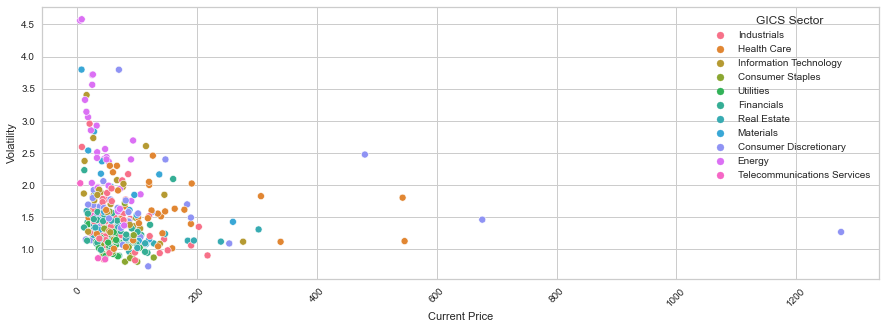

<IPython.core.display.Javascript object>

In [29]:
# Looking at the volatility against stock prices across sectors:
plt.figure(figsize=(15, 5))

ax = sns.scatterplot(x="Current Price", y="Volatility", data=df, hue="GICS Sector")
plt.xticks(rotation=45)
plt.show()

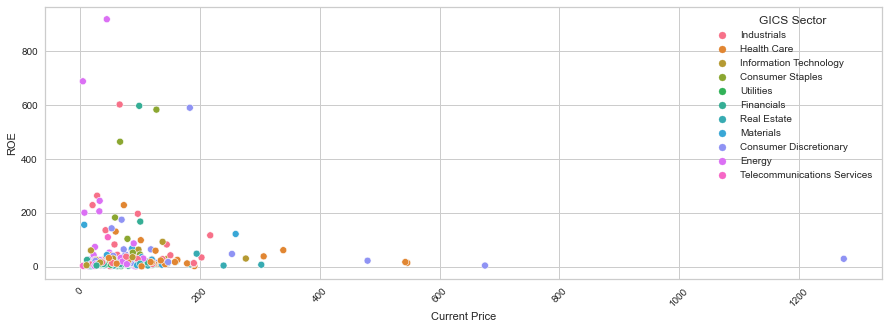

<IPython.core.display.Javascript object>

In [30]:
# Looking at the Return on Equity against stock prices across sectors:
plt.figure(figsize=(15, 5))

ax = sns.scatterplot(x="Current Price", y="ROE", data=df, hue="GICS Sector")
plt.xticks(rotation=45)
plt.show()

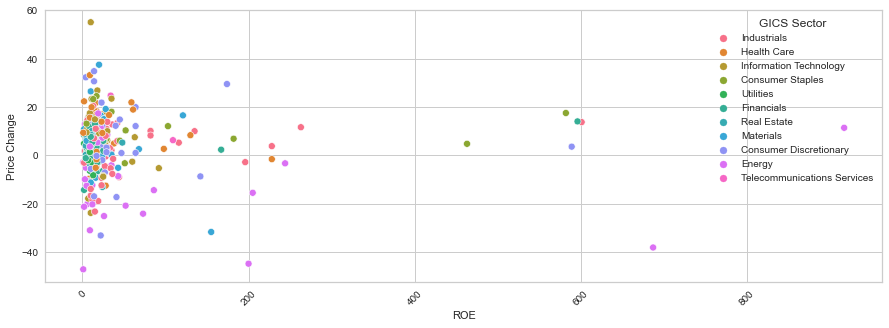

<IPython.core.display.Javascript object>

In [31]:
# Looking at the Return on Equity against percentage price change across sectors:
plt.figure(figsize=(15, 5))

ax = sns.scatterplot(y="Price Change", x="ROE", data=df, hue="GICS Sector")
plt.xticks(rotation=45)
plt.show()

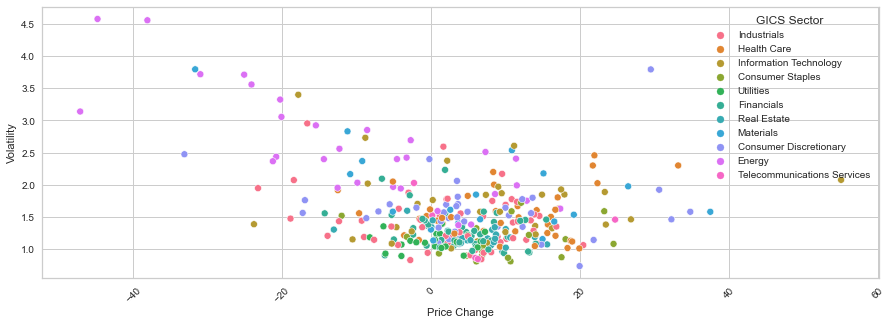

<IPython.core.display.Javascript object>

In [32]:
# Looking at the percentage price change againts stock prices across sectors:
plt.figure(figsize=(15, 5))

ax = sns.scatterplot(x="Price Change", y="Volatility", data=df, hue="GICS Sector")
plt.xticks(rotation=45)
plt.show()

**Observations:**

* The energy sector is highly volatile and records the highest ROE.
* Interestingly, Telecommunications Services records the highest net income despite having negative P/B, Net Cash Flow and lowest Current Price values. This may be because the sector holds by far the highest Estimated Shares Outstanding shared among just 5 companies.
* Most activity is identified between the -20% and 20% Price Change Margin.
* Another noticeable trend is that activities are clustered below the 200 dollar margin. This holds true for Price Change, Volatility and ROE.
* The utilities sector performs below average on most indices.



    

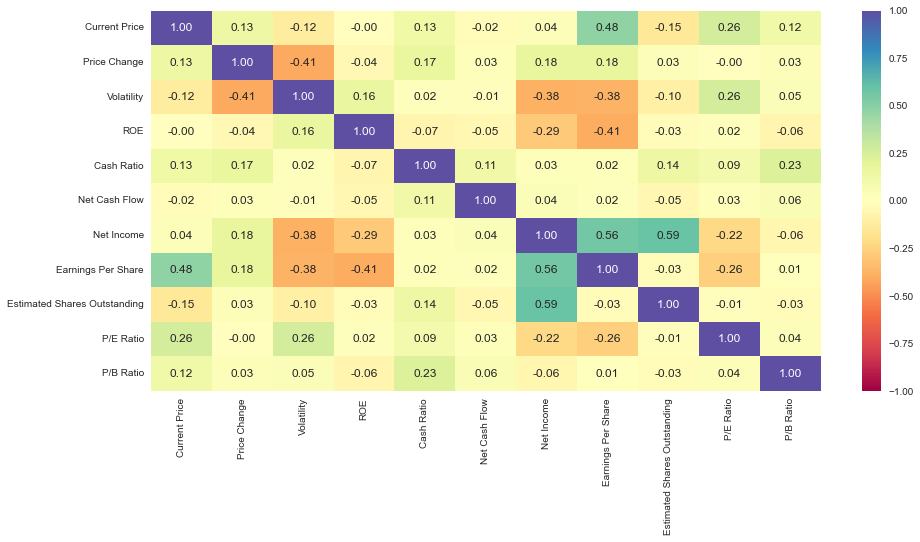

<IPython.core.display.Javascript object>

In [33]:
# Lets check the correlation amongst variables:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

There doesn't appear to be very strong correlations between the variables but we can see that Net Income has the highest correlation score with Earnings per Share and Estimated Shares Outstanding

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

**Answers:**

 1. The stock price distribution is heavily skewed to the right with outliers on the upper tail of the boxplot.   
 2. The sector with the maximum price increase is Healthcare.
 3. The variables are not very strongly corelated but a positive correlation is noticed between Net Income and Earnings per Share and Etsimated Shares outstanding. There's also a fair correlation between Earnings per Share and Current Price.
 4. Cash ratio is highest in the Information Technology sector. Next in line are the Healthcare and Energy sectors.
 5. Aside from the Energy sector where the ratio is highest, P/E Ratios do not vary too widely. The next highest in ranking are Real Estate and Healthcare sectors. The Utilities sector has the lowest P/E Ratio.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outcomes:
* We have no missing values, as already established.
* The data will be scaled as is required before clustering and this will take care of outliers in the data.
We will go on to check for duplicates and carry out other preprocessing steps as may be required.

In [34]:
# Check for duplicates:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

There are no duplicated values in the dataset. Let's proceed to scale the data:

In [35]:
# Function to drop the categorical columns and scale the data:
sc = StandardScaler()
tradeahead_scaled = pd.DataFrame(
    sc.fit_transform(
        df.drop(
            ["Ticker Symbol", "Company", "GICS Sector", "GICS Sub Industry"], axis=1
        )
    ),
    columns=df.drop(
        ["Ticker Symbol", "Company", "GICS Sector", "GICS Sub Industry"], axis=1
    ).columns,
)
tradeahead_scaled.head()  # Show the transformed dataframe

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


<IPython.core.display.Javascript object>

The data has been transformed. It can be explored again before clustering.

## EDA

- It is a good idea to explore the data once again after manipulating it.

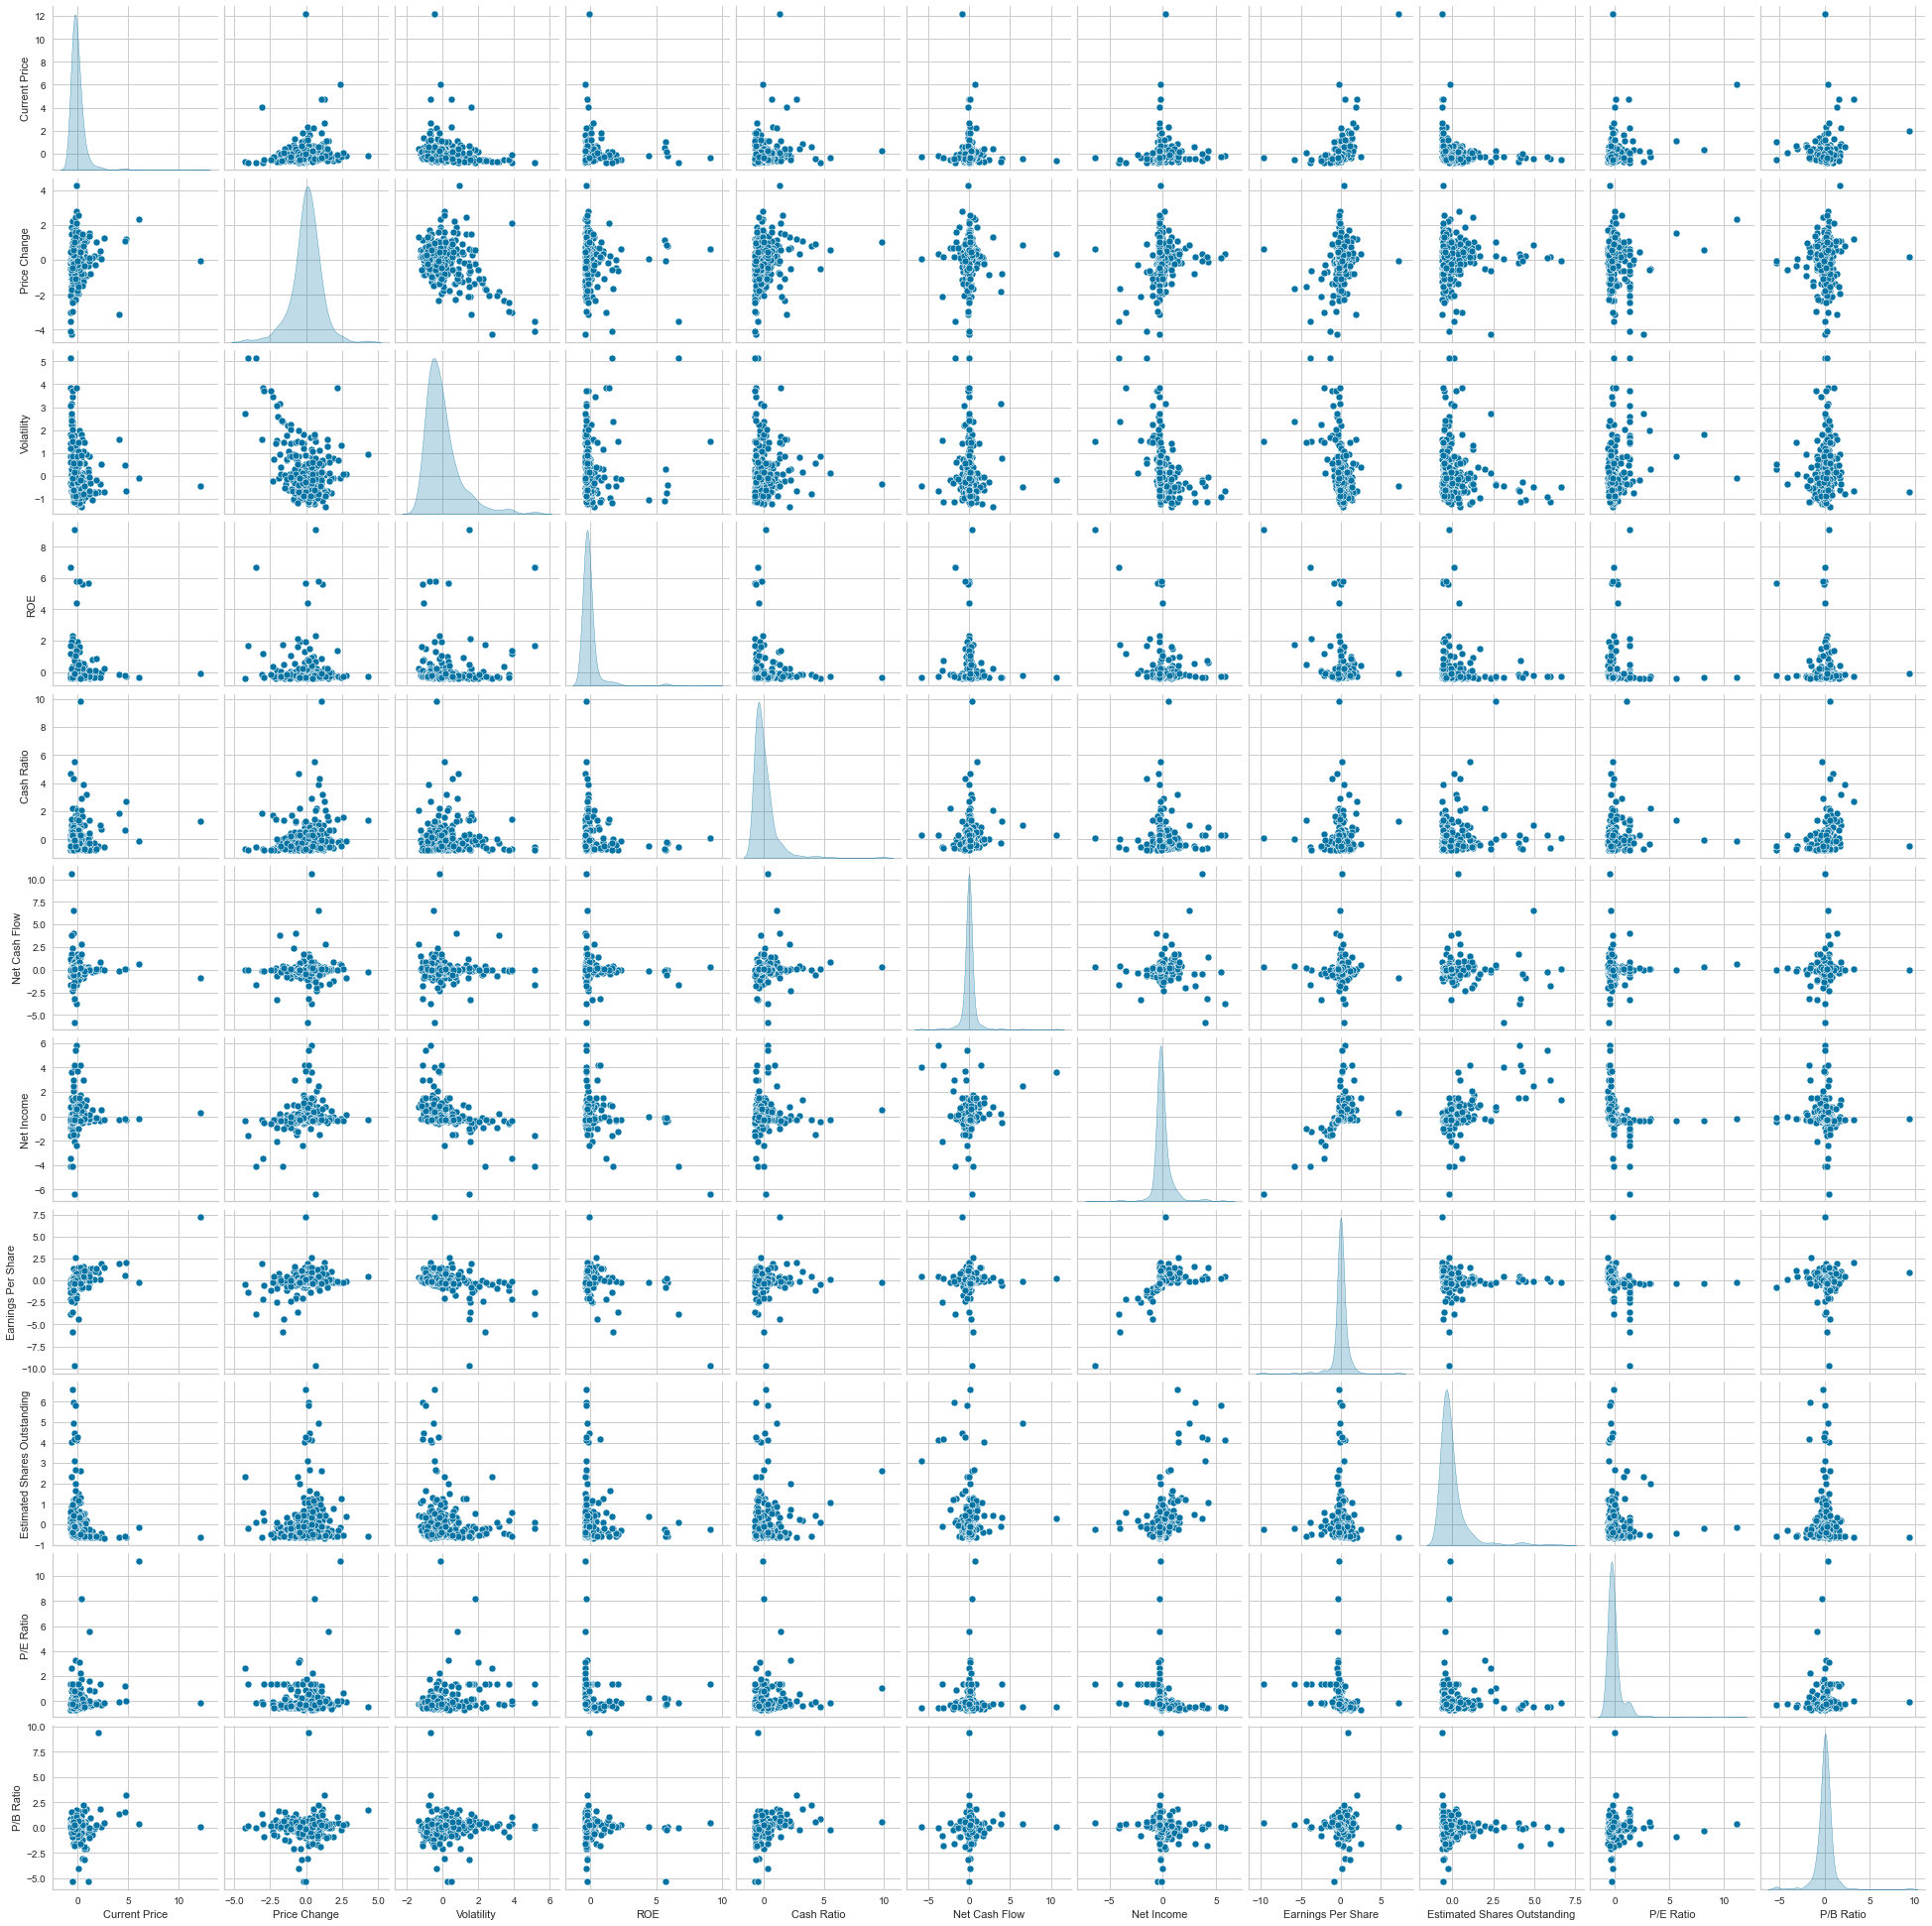

<IPython.core.display.Javascript object>

In [36]:
# Quick visualization using a pairplot:
sns.pairplot(data=tradeahead_scaled, diag_kind="kde")
plt.show()

* We can see as many as 3 humps for some of the variables. 
* The patterns earlier noted for Price Change and the 200 dollar margins are also visible.

## K-means Clustering

We will be using K-Means Clutering to group the data by attributes and subsequently determine the optimal number of clusters using the elbow method.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

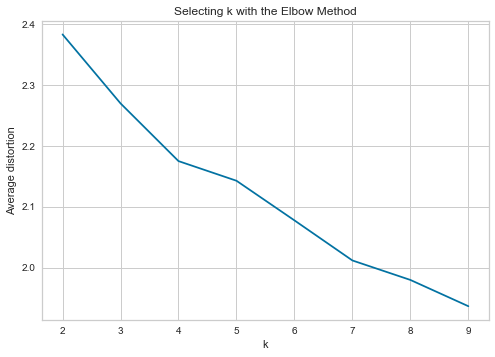

<IPython.core.display.Javascript object>

In [37]:
#Finding optimal no. of clusters
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(tradeahead_scaled)
    prediction=model.predict(tradeahead_scaled)
    meanDistortions.append(sum(np.min(cdist(tradeahead_scaled, model.cluster_centers_, 'euclidean'), axis=1)) /tradeahead_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


There's a sharp elbow at 3, 4, 6 and another at 8. Either k value may be okay. Let's use Silhouette scores and the Silhouette visualizer to see if we can better identify the best k.

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.45483520750820555
For n_clusters = 5, silhouette score is 0.39313809205786904
For n_clusters = 6, silhouette score is 0.3863465606304045
For n_clusters = 7, silhouette score is 0.3872228334908997
For n_clusters = 8, silhouette score is 0.3781935188441253
For n_clusters = 9, silhouette score is 0.38013726893228206


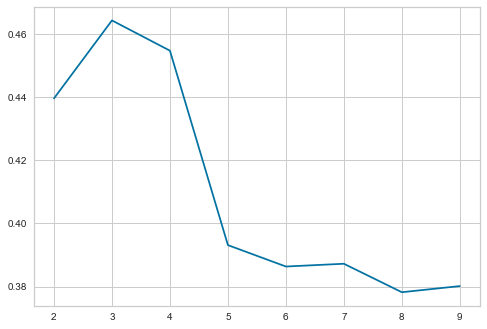

<IPython.core.display.Javascript object>

In [38]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((tradeahead_scaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(tradeahead_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**We observe the highest Silhouette score at k = 3 which is a deviation from what the elbow plot suggested. Let's visualize with the silhouette k's.**

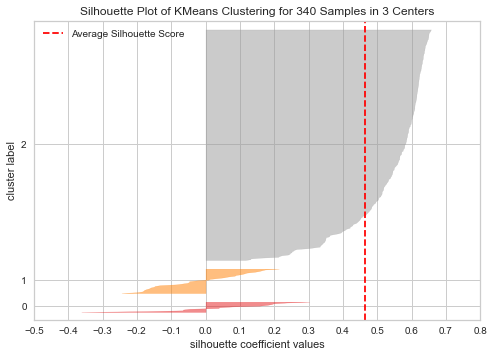

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [39]:
# finding optimal no. of clusters with silhouette coefficients
visualizer1 = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer1.fit(tradeahead_scaled)
visualizer1.show()

At k=3 the clusters are very unevenly distributed with Cluster 3 taking up over 80% of the plot. There are also negative silhouette values which we can expect due to the presence of outliers in the original data but for Cluster 2, the negative values seem to be more than the positive values. Let's visualize with other values of 'k' and see if the clusters improve.

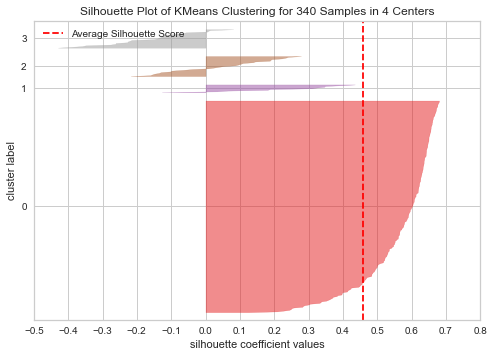

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [40]:
# finding optimal no. of clusters with silhouette coefficients
visualizer2 = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer2.fit(tradeahead_scaled)
visualizer2.show()

k=4 produces results that are less satisfactory. Cluster 4 consists of mostly negative coefficient readings.

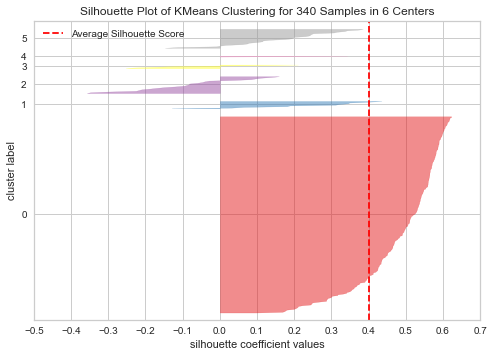

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [41]:
# finding optimal no. of clusters with silhouette coefficients
visualizer3 = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer3.fit(tradeahead_scaled)
visualizer3.show()

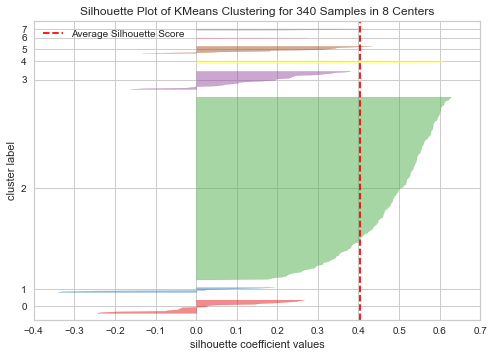

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [42]:
# finding optimal no. of clusters with silhouette coefficients
visualizer4 = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer4.fit(tradeahead_scaled)
visualizer4.show()

At k=3 and k=4 are where we find clusters that contain a significant number of observations. Subsequent iterations have some clusters that are too small for consideration.

In [43]:
# Let's copy the scaled dataset:
df1 = tradeahead_scaled.copy()

<IPython.core.display.Javascript object>

In [44]:
# Copying the original numerical dataset:
df2 = df.copy()

<IPython.core.display.Javascript object>

### Starting with k=3:

In [45]:
# Fitting with k=3:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=3, random_state=0)

<IPython.core.display.Javascript object>

In [46]:
# Adding kmeans cluster labels to the original dataframe:
df2["K_means_segments"] = kmeans.labels_
df2.head()

,Ticker Symbol,Company,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,2


<IPython.core.display.Javascript object>

In [47]:
# Adding the cluster column to the scaled dataframe:
df1["K_means_segments"] = kmeans.labels_
df1.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653,0
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205,0
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941,0
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333,0
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196,2


<IPython.core.display.Javascript object>

In [48]:
# Create the dataframe of cluster profiles:
cluster_profile = df2.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [49]:
# Add the counts column:
cluster_profile["count_in_each_segment"] = (
    df2.groupby("K_means_segments")["Company"].count().values
)

<IPython.core.display.Javascript object>

In [50]:
# Display the cluster profiles for max averages:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,84.250468,5.595187,1.402117,34.146758,66.815700,10741689.419795,1449597119.453925,3.902338,426357529.820239,24.416003,-2.011211,293
1,52.142857,6.779993,1.175153,26.142857,140.142857,760285714.285714,13368785714.285715,3.769286,3838879870.871428,20.654832,-3.529270,14
2,62.963940,-10.537087,2.774534,93.696970,68.757576,154287151.515152,-3145581545.454545,-7.639091,530986678.995152,110.461063,1.651207,33


<IPython.core.display.Javascript object>

In [51]:
# Display the cluster profiles for minimum values:
cluster_profile.style.highlight_min(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,84.250468,5.595187,1.402117,34.146758,66.815700,10741689.419795,1449597119.453925,3.902338,426357529.820239,24.416003,-2.011211,293
1,52.142857,6.779993,1.175153,26.142857,140.142857,760285714.285714,13368785714.285715,3.769286,3838879870.871428,20.654832,-3.529270,14
2,62.963940,-10.537087,2.774534,93.696970,68.757576,154287151.515152,-3145581545.454545,-7.639091,530986678.995152,110.461063,1.651207,33


<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'Cash Ratio'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'Current Price'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'Earnings Per Share'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'Estimated Shares Outstanding'}, xlabel='[K_means_segments]'>],
       [<AxesSubplot:title={'center':'Net Cash Flow'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'Net Income'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'P/B Ratio'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'P/E Ratio'}, xlabel='[K_means_segments]'>],
       [<AxesSubplot:title={'center':'Price Change'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'ROE'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'Volatility'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:>]], dtype=object)

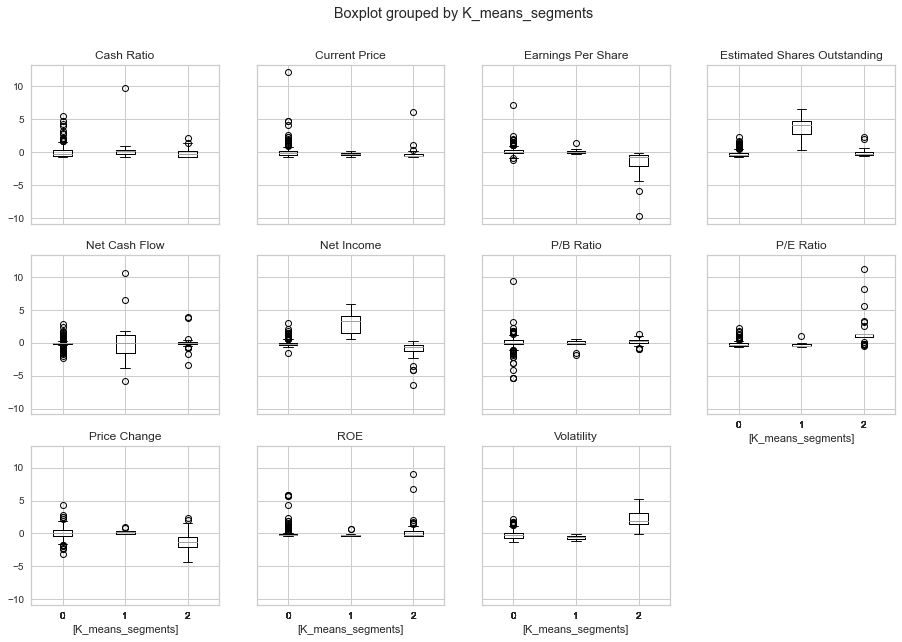

<IPython.core.display.Javascript object>

In [52]:
df1.boxplot(by="K_means_segments", layout=(3, 4), figsize=(15, 10))

At k=3, we have very uneven clusters and plenty of outliers visible in the boxplots. We can see that Cluster 1 contains the most observations and the rows with the max `Earnings Per Share` and `Current Price` values. Conversely it also contains rows with the minimum `Cash Ratio`, `Net Cash Flow` and `Estimated Shares Outstanding`.

Let's look at the cluster profiling for other iterations of k.

#### k=4:

In [53]:
# Let's try for k=4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=4, random_state=0)

<IPython.core.display.Javascript object>

In [54]:
# Adding kmeans cluster labels to the original dataframe:
df2["K_means_segments"] = kmeans.labels_
df2.head()

,Ticker Symbol,Company,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,3


<IPython.core.display.Javascript object>

In [55]:
# Add kmeans cluster labels to the scaled dataframe:
df1["K_means_segments"] = kmeans.labels_
df1.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653,0
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205,0
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941,0
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333,0
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196,3


<IPython.core.display.Javascript object>

In [56]:
# Create the cluster profiles:
cluster_profile = df2.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [57]:
# Append the counts column:
cluster_profile["count_in_each_segment"] = (
    df2.groupby("K_means_segments")["Company"].count().values
)

<IPython.core.display.Javascript object>

In [58]:
# Display the profiles with max average values:
cluster_profile.style.highlight_max(color="lightblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.633943,5.321544,1.391620,34.592857,55.228571,61386803.571429,1522862135.714286,3.601018,436580604.736821,23.824511,-3.275890,280
1,38.528334,-13.350083,2.879171,102.400000,58.133333,112578533.333333,-3508035633.333333,-8.478667,486572571.764667,88.606990,2.123232,30
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
3,286.534383,12.306982,1.598359,19.105263,303.421053,532217368.421053,1250865052.631579,7.602105,634883970.585263,84.018913,16.811618,19


<IPython.core.display.Javascript object>

In [59]:
# Display the profiles with minimum average values:
cluster_profile.style.highlight_min(color="lightblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.633943,5.321544,1.391620,34.592857,55.228571,61386803.571429,1522862135.714286,3.601018,436580604.736821,23.824511,-3.275890,280
1,38.528334,-13.350083,2.879171,102.400000,58.133333,112578533.333333,-3508035633.333333,-8.478667,486572571.764667,88.606990,2.123232,30
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
3,286.534383,12.306982,1.598359,19.105263,303.421053,532217368.421053,1250865052.631579,7.602105,634883970.585263,84.018913,16.811618,19


<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'Cash Ratio'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'Current Price'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'Earnings Per Share'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'Estimated Shares Outstanding'}, xlabel='[K_means_segments]'>],
       [<AxesSubplot:title={'center':'Net Cash Flow'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'Net Income'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'P/B Ratio'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'P/E Ratio'}, xlabel='[K_means_segments]'>],
       [<AxesSubplot:title={'center':'Price Change'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'ROE'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:title={'center':'Volatility'}, xlabel='[K_means_segments]'>,
        <AxesSubplot:>]], dtype=object)

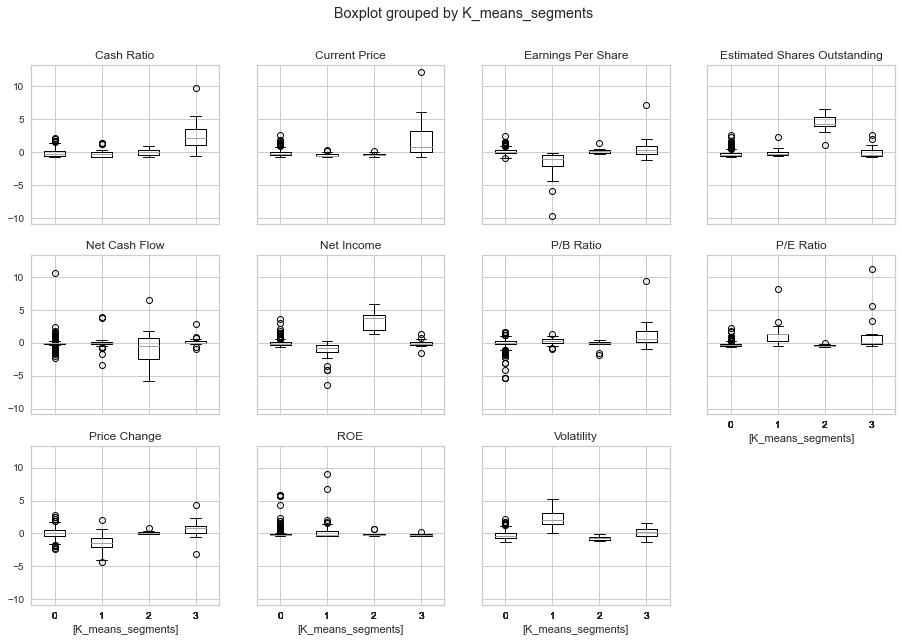

<IPython.core.display.Javascript object>

In [60]:
# Do a boxplot of the profiles:
df1.boxplot(by="K_means_segments", layout=(3, 4), figsize=(15, 10))

At k=4, Cluster 1 holds only the minimum `Estimated Shares Outstanding` and `Cash Ratio` values. The number of observations is down 280 from 293. Looking at the boxplots, only Clusters 2-4 show distinct values for some attributes with the exception of the minimum values recorded.  Let's try one more iteration and compare the outcomes.

#### k=5:

In [61]:
# Let's look at k=5:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=5, random_state=0)

<IPython.core.display.Javascript object>

In [62]:
# Adding kmeans cluster labels to the original dataframe
df2["K_means_segments"] = kmeans.labels_
df2.head()

,Ticker Symbol,Company,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,3


<IPython.core.display.Javascript object>

In [63]:
# Add the cluster labels to the scaled dataframe:
df1["K_means_segments"] = kmeans.labels_
df1.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653,0
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205,0
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941,0
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333,0
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196,3


<IPython.core.display.Javascript object>

In [64]:
cluster_profile = df2.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [65]:
cluster_profile["count_in_each_segment"] = (
    df2.groupby("K_means_segments")["Company"].count().values
)

<IPython.core.display.Javascript object>

In [66]:
cluster_profile.style.highlight_max(color="lightpink", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.588842,5.284868,1.385969,25.132353,55.636029,-4138216.911765,1494114330.882353,3.653989,434750693.162904,23.730836,-3.090224,272
1,72.783335,0.912232,2.015435,542.666667,34.000000,-350866666.666667,-5843677777.777778,-14.735556,372500020.988889,53.574485,-8.831054,9
2,38.475315,-13.021608,2.838837,36.857143,59.642857,145894857.142857,-1733345321.428571,-3.982857,513928151.351429,84.968229,2.407361,28
3,286.534383,12.306982,1.598359,19.105263,303.421053,532217368.421053,1250865052.631579,7.602105,634883970.585263,84.018913,16.811618,19
4,47.710000,5.972014,1.154423,29.000000,77.833333,747416666.666667,14921000000.000000,4.156667,4011013535.683333,14.653677,-4.250943,12


<IPython.core.display.Javascript object>

In [67]:
cluster_profile.style.highlight_min(color="lightpink", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.588842,5.284868,1.385969,25.132353,55.636029,-4138216.911765,1494114330.882353,3.653989,434750693.162904,23.730836,-3.090224,272
1,72.783335,0.912232,2.015435,542.666667,34.000000,-350866666.666667,-5843677777.777778,-14.735556,372500020.988889,53.574485,-8.831054,9
2,38.475315,-13.021608,2.838837,36.857143,59.642857,145894857.142857,-1733345321.428571,-3.982857,513928151.351429,84.968229,2.407361,28
3,286.534383,12.306982,1.598359,19.105263,303.421053,532217368.421053,1250865052.631579,7.602105,634883970.585263,84.018913,16.811618,19
4,47.710000,5.972014,1.154423,29.000000,77.833333,747416666.666667,14921000000.000000,4.156667,4011013535.683333,14.653677,-4.250943,12


<IPython.core.display.Javascript object>

#### Observations:
* At k=3, we observe the highest P/E Ratio in Cluster 3. The `P/E Ratio` is the most common metric for evaluating stock and so this clustering points to a profitable portfolio. 
* We also observe the highest `Net Cash Flow` in Cluster 2 at K=3. This is makes the portfolio particularly profitable for companies.
* The values for k=4 and k=5 are mostly the same or around the same range.
* While k=5 contains some very high values, the cluster sizes are too small whic points to outliers which will not make for a good cluster.
* A consistent pairing through all iterations is the `Net Income` and `Estimated Shares Outstanding` pairing. Every cluster nesting the highest `Net Income` also holds the highest `Estimated Shares Outstanding`.

**Let us explore outcomes with Hierarchical Clustering.**

## Hierarchical Clustering:

In [68]:
# Copy the scaled dataset.
df3 = tradeahead_scaled.copy()

<IPython.core.display.Javascript object>

In [69]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df3, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df3))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524589.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850003.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

<IPython.core.display.Javascript object>

In [70]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

In [71]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df3, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df3))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [72]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**Let's see the dendrograms:**

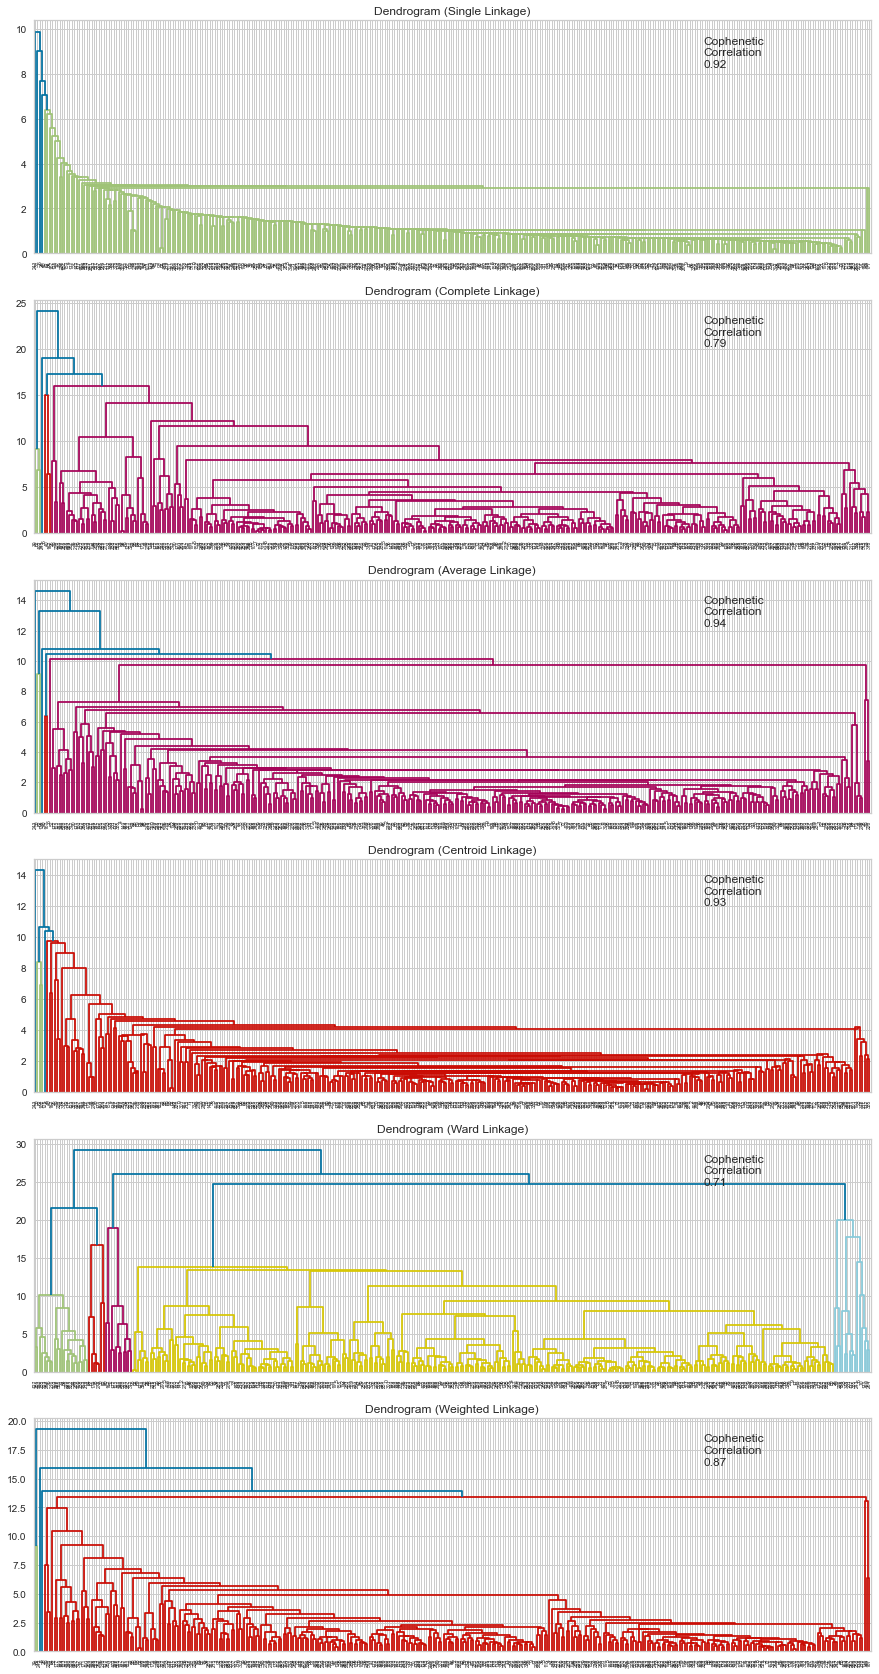

<IPython.core.display.Javascript object>

In [73]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df3, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df3))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [74]:
# Print a dataframe to compare the cophenetic correlations for the different linkage methods
comp_coeff = pd.DataFrame(compare, columns=compare_cols)
comp_coeff = comp_coeff.sort_values(by="Cophenetic Coefficient")
comp_coeff

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


<IPython.core.display.Javascript object>

### Beginning Average linkage because it delivers the highest cophenetic coefficient values, let's begin clustering at k=3:

#### K=3:

In [75]:
# Build a HC model using  average linkage at k=3:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(df3)

AgglomerativeClustering(linkage='average', n_clusters=3)

<IPython.core.display.Javascript object>

In [76]:
# Copy the original dataset:
df4 = df.copy()

<IPython.core.display.Javascript object>

In [77]:
# Add the cluster columns to the dataframes:
df3["HC_Clusters"] = HCmodel.labels_
df4["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling:

In [78]:
# Create the profiles dataframe:
cluster_profile = df4.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [79]:
# Add the count column:
cluster_profile["count_in_each_segments"] = (
    df4.groupby("HC_Clusters")["Company"].count().values
)

<IPython.core.display.Javascript object>

In [80]:
# Let's display cluster profiles created:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,77.653642,4.184271,1.515129,35.103858,69.798220,68662246.290801,1613508620.178041,2.900905,578930419.447478,32.466828,-1.739711,337
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2


<IPython.core.display.Javascript object>

In [81]:
# let's see the names of the companies in each cluster
for cl in df4["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df4[df4["HC_Clusters"] == cl]["Company"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

<IPython.core.display.Javascript object>

In [82]:
# let's see the names of the Sectors in each cluster
for cl in df4["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df4[df4["HC_Clusters"] == cl]["GICS Sector"].unique())
    print()

In cluster 0, the following companies are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Energy' 'Telecommunications Services']

In cluster 2, the following companies are present:
['Energy']

In cluster 1, the following companies are present:
['Consumer Discretionary']



<IPython.core.display.Javascript object>

At k=3 we have very uneven clustering for both companies and sectors. Cluster 2 contains a sole stock from the energy sector which we have come to identify as most volatile. This clustering is not good. Let's try at k=4.

#### k=4:

In [83]:
# Build a HC model using  average linkage at k=4:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(df3)

AgglomerativeClustering(linkage='average', n_clusters=4)

<IPython.core.display.Javascript object>

In [84]:
# Add cluster identifiers to the dataframes:
df3["HC_Clusters"] = HCmodel.labels_
df4["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling:

In [85]:
# Create the profiles dataframe:
cluster_profile = df4.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [86]:
# Add the count column:
cluster_profile["count_in_each_segments"] = (
    df4.groupby("HC_Clusters")["Company"].count().values
)

<IPython.core.display.Javascript object>

In [87]:
# lets display cluster profiles created:
cluster_profile.style.highlight_max(color="lightblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,77.573266,4.148438,1.515708,35.184524,67.154762,67104693.452381,1607391086.309524,2.905640,572317821.413095,32.325679,-1.762402,336
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1


<IPython.core.display.Javascript object>

At k=4 average linkage still is not looking good.

The method gives the highest cophenetic coefficient but the clustering is quite tight and very unevenly distributed. The Ward linkage gives more distinct, spaced out dendogram.

Let's try Ward's at k=3.

## Ward's Linkage:

In [88]:
# Build a HC model at k=3:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(df3)

AgglomerativeClustering(n_clusters=3)

<IPython.core.display.Javascript object>

In [89]:
# Add the cluster columns to the data:
df3["HC_Clusters"] = HCmodel.labels_
df4["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling:

In [90]:
# Create the profile dataframe:
cluster_profile = df4.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [91]:
# Add the counts column:
cluster_profile["count_in_each_segments"] = (
    df4.groupby("HC_Clusters")["Company"].count().values
)

<IPython.core.display.Javascript object>

In [92]:
# lets display cluster profile for max averages:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,85.036315,5.518930,1.437088,24.960265,73.228477,200761394.039735,1585347218.543046,3.858096,466893113.671622,29.038709,-1.537421,302
1,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9


<IPython.core.display.Javascript object>

In [93]:
# lets display cluster profile for minimum averages:
cluster_profile.style.highlight_min(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,85.036315,5.518930,1.437088,24.960265,73.228477,200761394.039735,1585347218.543046,3.858096,466893113.671622,29.038709,-1.537421,302
1,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9


<IPython.core.display.Javascript object>

In [94]:
# let's see the names of the companies in each cluster
for cl in df4["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df4[df4["HC_Clusters"] == cl]["Company"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Alexion Pharmaceuticals' 'Applied Materials Inc'
 'AMETEK Inc' 'Affiliated Managers Group Inc' 'Amgen Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'Amazon.com Inc'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Br

<IPython.core.display.Javascript object>

In [95]:
# let's see the names of the sectors in each cluster
for cl in df4["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df4[df4["HC_Clusters"] == cl]["GICS Sector"].unique())
    print()

In cluster 0, the following companies are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']

In cluster 1, the following companies are present:
['Industrials' 'Energy' 'Consumer Discretionary' 'Consumer Staples'
 'Materials' 'Financials' 'Information Technology']

In cluster 2, the following companies are present:
['Financials' 'Consumer Discretionary' 'Consumer Staples' 'Health Care'
 'Telecommunications Services' 'Energy']



<IPython.core.display.Javascript object>

**Observations:**

* At k=3, the largest cluster is over 90% of the data but does not cater to the P/E ratio though it holds the highest values for Earnings Per Share.
* We observe some familiar pairings on Clusters 2 and 3 such as `Net Income/ESO` and `Volatility/ P/E Ratio`.
* The over all values are mostly lower than k=3 for k-means clustering.

Let's try for k=4.

#### k=4:

In [96]:
# Build a HC model at k=4:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(df3)

AgglomerativeClustering(n_clusters=4)

<IPython.core.display.Javascript object>

In [97]:
# Add the cluster column to the datasets:
df3["HC_Clusters"] = HCmodel.labels_
df4["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [98]:
# Create the profile dataframe:
cluster_profile = df4.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [99]:
# Add the counts column:
cluster_profile["count_in_each_segments"] = (
    df4.groupby("HC_Clusters")["Company"].count().values
)

<IPython.core.display.Javascript object>

In [100]:
# Display the dataframe for max average values:
cluster_profile.style.highlight_max(color="lightblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,72.432035,5.255290,1.426349,25.512195,60.881533,196157425.087108,1623022236.933798,3.652840,462816085.049861,24.645506,-2.618234,287


<IPython.core.display.Javascript object>

In [101]:
# Display the dataframe for min average values:
cluster_profile.style.highlight_min(color="lightblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,72.432035,5.255290,1.426349,25.512195,60.881533,196157425.087108,1623022236.933798,3.652840,462816085.049861,24.645506,-2.618234,287


<IPython.core.display.Javascript object>

* We see a similar trend to the k-means clusters where as the k increased, the largest cluster held no maximum values but contains minimum values. At a point the largest cluster will hold no unique average values at all.
* Values at k=4 remain mostly similar to values at k=3 or higher. 
* A much higher P/E ratio observed at k=4. This clustering gives a generally good range of average values.

In [102]:
# let's see the names of the companies in each cluster
for cl in df4["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df4[df4["HC_Clusters"] == cl]["Company"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Cater

<IPython.core.display.Javascript object>

In [103]:
# This time let's see the names of the Sectors in each cluster:
for cl in df4["HC_Clusters"].unique():
    print("In cluster {}, the following sectors are present:".format(cl))
    print(df4[df4["HC_Clusters"] == cl]["GICS Sector"].unique())
    print()

In cluster 3, the following sectors are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']

In cluster 1, the following sectors are present:
['Information Technology' 'Health Care' 'Consumer Discretionary'
 'Real Estate' 'Telecommunications Services' 'Consumer Staples']

In cluster 0, the following sectors are present:
['Industrials' 'Energy' 'Consumer Discretionary' 'Consumer Staples'
 'Materials' 'Financials' 'Information Technology']

In cluster 2, the following sectors are present:
['Financials' 'Consumer Discretionary' 'Consumer Staples' 'Health Care'
 'Telecommunications Services' 'Energy']



<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'Cash Ratio'}, xlabel='[HC_Clusters]'>,
        <AxesSubplot:title={'center':'Current Price'}, xlabel='[HC_Clusters]'>,
        <AxesSubplot:title={'center':'Earnings Per Share'}, xlabel='[HC_Clusters]'>,
        <AxesSubplot:title={'center':'Estimated Shares Outstanding'}, xlabel='[HC_Clusters]'>],
       [<AxesSubplot:title={'center':'Net Cash Flow'}, xlabel='[HC_Clusters]'>,
        <AxesSubplot:title={'center':'Net Income'}, xlabel='[HC_Clusters]'>,
        <AxesSubplot:title={'center':'P/B Ratio'}, xlabel='[HC_Clusters]'>,
        <AxesSubplot:title={'center':'P/E Ratio'}, xlabel='[HC_Clusters]'>],
       [<AxesSubplot:title={'center':'Price Change'}, xlabel='[HC_Clusters]'>,
        <AxesSubplot:title={'center':'ROE'}, xlabel='[HC_Clusters]'>,
        <AxesSubplot:title={'center':'Volatility'}, xlabel='[HC_Clusters]'>,
        <AxesSubplot:>]], dtype=object)

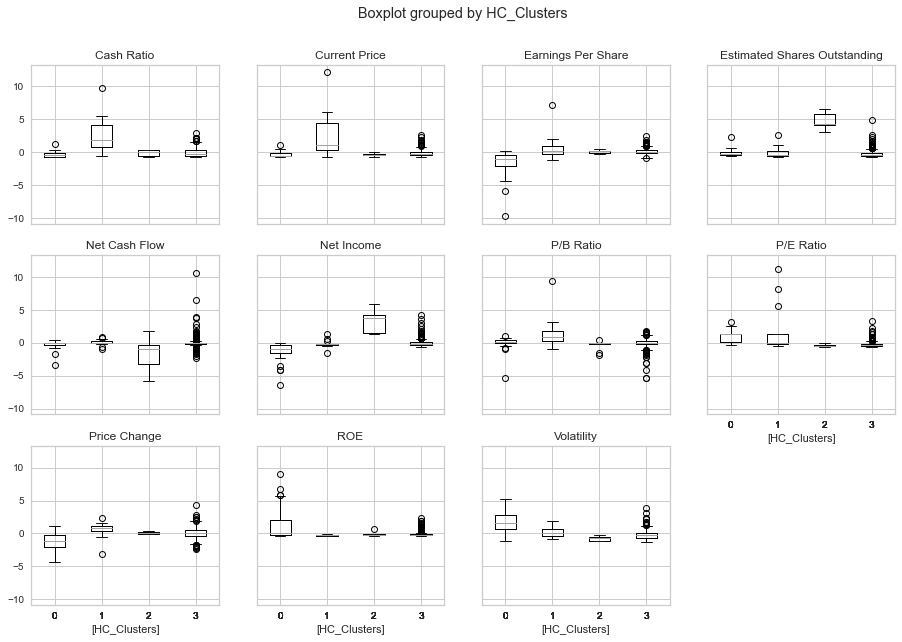

<IPython.core.display.Javascript object>

In [104]:
# Boxplots of clusters from HC with Ward's linkage at k=4:
df3.boxplot(by="HC_Clusters", layout=(3, 4), figsize=(15, 10))

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How do the silhouette scores vary?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

## Observations on Clustering Techniques:
* K-Means Clustering took longer to execute but delivers more obvious information than is immediately available with Hierarchical Clustering.

* Both techniques delivered very similar clustering in the sense that the clusters were rather uneven. This can be attributed to the presence of outliers in the data. An attempt to clip the outliers rendered the same results while removing the outliers completely reduced the size of the dataset to 163 rows which was too much information loss to deliver reliable analyses.

* k-Means delivered lower silhouette scores ranging from 0.39 to 0.46 while Hierarchical Clustering delivered higher values for cophenetic coefficients ranging from 0.71 to 0.95

* k=4 is acceptable for both k-means and hierarchical clustering techniques. This is because at k=4, the boxplots show maximum and minimum values that are not entirely distorted by outliers. This means that the averages are more reliable over time.

* After k=4, both techniques start to render clusters with mostly similar values or very small clusters that cannot be used for evaluation.

* Both techniques produced uneven clustering, as mentioned before. At k=4, K-Means has 220,30,11 and 19 observations for clusters 1, 2 and 3 respectively. Hierarchical Clustering with Ward's linkage at k=4 has 287, 9, 15 and 29 observations per cluster in order 1-4.  

* At k=4 for HC, while grouping by Company, the clustering appears uneven but when grouped by GICS Sector, the clustering appeared more balanced.

* The most consistent pairing of variables is Net Income to Estimated Shares Outsanding. Others are Volatility/ROE

* Both techniques render almost the same variables within their clusters.





## Actionable Insights and Recommendations



### Insights:

## A
**Cluster 0(k-means)/Cluster 3(HC)**
* The companies in this group do not hold any of the highest average values but have the minimum Cash Ratio and Estimated Shares Outstanding. Companies in this cluster will not be attractive to short sellers and depending on the cause of low ESO, may have challenges with liquidity. These companies will also appeal to risk neutral investors and those who intend to invest over over a long period

## B
**Cluster 1(k-means)/Cluster 0(HC)**
* These clusters hold companies that have high ROE and Volatility. Cluster 1 also holds companies with high P/E Ratios. The effect of the high volatilty reflects in the contrast between high ROE and low share price and low net income for the companies in the cluster. This portfolio is likely to hold a majority of Energy sector companies and will suit risk tolerant investors.

## C
**Cluster 2(k-means)/Cluster 2(HC)**
* These clusters are almost identical with high Net Income and Estimated Shares Outstanding. They also share low volatility, net cash flow and P/E ratios.These contain companies from the Telecommunications and IT sectors among others.

## D
**Cluster 3(k-means)/Cluster 1(HC)**
* These clusters are also almost identical. They share high share prices, price change, cash ratio, net cash flow, earnings per share and P/B Ratios. They also share low ROE.

### RECOMMENDATIONS:

**Trade&Ahead** can do any or all of the following:

   - Offer portfolios from `group A` to investors that intend to invest over a long period and are risk neutral.
   
   - Portfolios from `group B` will appeal to risk tolerant investors. This group also has low share prices and will appeal to people who wish to make a quick turn around on their investments. To minimise risk, the portfolio can be blended with companies from A and or C. Especially with companies from the Utilities and Real Estate sectors and offered to other investors.
   
   - `Group C` has a lot of well subscribed companies. They have low volatility and are likely to have moderate to high share pricing. It is a good portfolio for people with money looking to invest over long period and so Trade&Ahead can target such investors with this portfolio.
   
   - `Group D` will appeal to wealthy investors. The high share prices match with the high earnings per share. Trade&Ahead can offer this package as well as offering the companies the opportunity to balance shareholders' equity to improve their ROE.